**Topic:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      ***Project Luther***  
**Subject:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     ****Trump Tweets vs Stock Market ****  
**Date:**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       04/21/2018  
**Name:**   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      WENDY SANCHEZ-VAYNSHTEYN   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows',50)

# Trump Tweet Data 

In [3]:
# reading from list of files and merging it into one dataframe
def getData(data):
    merged_dfs = []    
    for i in data:
        print(i)
        file = pd.read_json(i)
        merged_dfs.append(file)
    return pd.concat(merged_dfs, ignore_index = True)

In [4]:
# importing Trumps tweets from 1/1/2017 to 4/19/2018 
data = ['masterttweets_2017.json', 'masterttweets_2018.json']
df = getData(data)


masterttweets_2017.json
masterttweets_2018.json


In [5]:
pd.set_option('display.max_colwidth',250)


In [6]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'is_retweet', 'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 32 columns):
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   3254 non-null datetime64[ns]
display_text_range           1554 non-null object
entities                     2605 non-null object
extended_entities            497 non-null object
favorite_count               3254 non-null int64
favorited                    2605 non-null object
full_text                    1554 non-null object
geo                          0 non-null float64
id                           2605 non-null float64
id_str                       3254 non-null int64
in_reply_to_screen_name      46 non-null object
in_reply_to_status_id        45 non-null float64
in_reply_to_status_id_str    45 non-null float64
in_reply_to_user_id          46 non-null float64
in_reply_to_user_id_str      64 non-null float64
is_quote_status              2605 non-null object

In [8]:
# text and full_text columns have switch NaN's and info. Merging them will solve the problem.
df['text'].fillna(df.full_text, inplace = True)
#test.sort_values(by='created_at')

In [9]:
df.loc[: ,['created_at', 'text']]

,created_at,text
0,2018-01-01 13:37:52,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!"
1,2018-01-01 12:44:40,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of I..."
2,2018-01-01 12:12:00,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in A..."
3,2017-12-31 23:43:04,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!"
4,2017-12-31 22:18:20,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!"
5,2017-12-31 22:00:21,"Iran, the Number One State of Sponsored Terror with numerous violations of Human Rights occurring on an hourly basis, has now closed down the Internet so that peaceful demonstrators cannot communicate. Not good!"
6,2017-12-31 19:06:52,"What a year it’s been, and we're just getting started. Together, we are MAKING AMERICA GREAT AGAIN! Happy New Year!! https://t.co/qsMNyN1UJG"
7,2017-12-31 18:36:28,"My deepest condolences to the victims of the terrible shooting in Douglas County @DCSheriff, and their families. We love our police and law enforcement - God Bless them all! #LESM"
8,2017-12-31 13:36:32,"Why would smart voters want to put Democrats in Congress in 2018 Election when their policies will totally kill the great wealth created during the months since the Election. People are much better off now not to mention ISIS, VA, Judges, Strong ..."
9,2017-12-31 13:26:29,"If the Dems (Crooked Hillary) got elected, your stocks would be down 50% from values on Election Day. Now they have a great future - and just beginning! https://t.co/9TzSC8F8vY"


In [10]:
# importing textBlob for sentiment analysis
from textblob import TextBlob

In [11]:
# making new column sentiment with sentiment values from textBlob
# The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df['sentiment'] = df['text'].map(lambda a: TextBlob(str(a)).sentiment)
df['polarity'] = df['text'].map(lambda a: TextBlob(str(a)).polarity)
df['subjectivity'] = df['text'].map(lambda a: TextBlob(str(a)).sentiment.subjectivity)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 35 columns):
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   3254 non-null datetime64[ns]
display_text_range           1554 non-null object
entities                     2605 non-null object
extended_entities            497 non-null object
favorite_count               3254 non-null int64
favorited                    2605 non-null object
full_text                    1554 non-null object
geo                          0 non-null float64
id                           2605 non-null float64
id_str                       3254 non-null int64
in_reply_to_screen_name      46 non-null object
in_reply_to_status_id        45 non-null float64
in_reply_to_status_id_str    45 non-null float64
in_reply_to_user_id          46 non-null float64
in_reply_to_user_id_str      64 non-null float64
is_quote_status              2605 non-null object

In [12]:
d1 = df[['created_at', 'display_text_range','entities', 'extended_entities', 'favorite_count', 'favorited','full_text', 'id', 'id_str', 'in_reply_to_screen_name','in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status','is_retweet', 'lang', 'possibly_sensitive', 'retweet_count','retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user','sentiment', 'polarity', 'subjectivity']]

In [13]:
d1 = d1.sort_values("created_at")

In [14]:
# if hour is after 4pm when Dow Jones closes, shift date to next day and record this date in new column adjusted_date
d1['adjusted_date']= [x + datetime.timedelta(days=1) if x.hour > 16 else x for x in d1['created_at']] 
d1

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,retweeted,retweeted_status,source,text,truncated,user,sentiment,polarity,subjectivity,adjusted_date
2604,2017-01-01 05:00:10,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags': [{'indices': [18, 31], 'text': 'HappyNewYear'}], 'urls': [{'indices': [125, 148], 'url': 'https://t.co/1asdMAL4iy', 'expanded_url': 'https://twitter.com/i/web/status/815422340540547073', 'display_u...",NaN,126230,False,NaN,8.154223e+17,815422340540547072,None,...,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",TO ALL AMERICANS-\n#HappyNewYear &amp; many blessings to you all! Looking forward to a wonderful &amp; prosperous 2017 as we… https://t.co/1asdMAL4iy,True,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.8125, 0.75)",0.812500,0.750000,2017-01-01 05:00:10
2603,2017-01-01 05:39:13,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 14], 'screen_name': 'DanScavino', 'id': 620571475, 'name': 'Dan Scavino Jr.', 'id_str': '620571475'}, {'indices': [51, 61], 'screen_name': 'TeamTrump', 'id': 729676086632656900, 'name': 'Official ...",NaN,0,False,NaN,8.154322e+17,815432169464197120,None,...,False,"{'contributors': None, 'quoted_status_id': 815422340540547073, 'text': 'On behalf of our next #POTUS &amp; @TeamTrump- #HappyNewYear AMERICA🇺🇸 https://t.co/Y6XDdijXea… https://t.co/uV5M16xRN5', 'is_quote_status': True, 'in_reply_to_status_id': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @DanScavino: On behalf of our next #POTUS &amp; @TeamTrump-\n\n#HappyNewYear AMERICA🇺🇸\n\nhttps://t.co/Y6XDdijXea\nhttps://t.co/D8plL7xHql\nhttps:…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.0, 0.0)",0.000000,0.000000,2017-01-01 05:39:13
2602,2017-01-01 05:43:23,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 10], 'screen_name': 'Reince', 'id': 20733972, 'name': 'Reince Priebus', 'id_str': '20733972'}, {'indices': [105, 121], 'screen_name': 'realDonaldTrump', 'id': 25073877, 'name': 'Donald J. Trump', ...",NaN,0,False,NaN,8.154332e+17,815433217595547648,None,...,False,"{'contributors': None, 'truncated': False, 'text': 'Happy New Year + God's blessings to you all. Looking forward to incredible things in 2017! @realDonaldTrump will Make America Great Again!', 'is_quote_status': False, 'in_reply_to_status_id': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Reince: Happy New Year + God's blessings to you all. Looking forward to incredible things in 2017! @realDonaldTrump will Make America…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.6454545454545455, 0.7848484848484848)",0.645455,0.784848,2017-01-01 05:43:23
2601,2017-01-01 05:44:17,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 13], 'screen_name': 'EricTrump', 'id': 39349894, 'name': 'Eric Trump', 'id_str': '39349894'}, {'indices': [89, 102], 'screen_name': 'LaraLeaTrump', 'id': 75541946, 'name': 'Lara Trump', 'id_str': ...",NaN,0,False,NaN,8.154334e+17,815433444591304704,None,...,False,"{'contributors': None, 'truncated': False, 'text': '2016 was such an incredible year for our entire family! My beautiful wife @LaraLeaTrump made it even better! 🇺🇸🇺🇸 https://t.co/M0SuRGn0il', 'is_quote_status': False

In [15]:
# added new column 'day' that displays the day (0-6) of the week to be able to spot weekends
#d1['day']= [x.strftime('%A') for x in d1['adjusted_date']]

d1['day']= d1['adjusted_date'].dt.dayofweek
d1.head(15)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,retweeted_status,source,text,truncated,user,sentiment,polarity,subjectivity,adjusted_date,day
2604,2017-01-01 05:00:10,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags': [{'indices': [18, 31], 'text': 'HappyNewYear'}], 'urls': [{'indices': [125, 148], 'url': 'https://t.co/1asdMAL4iy', 'expanded_url': 'https://twitter.com/i/web/status/815422340540547073', 'display_u...",NaN,126230,False,NaN,8.154223e+17,815422340540547072,None,...,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",TO ALL AMERICANS-\n#HappyNewYear &amp; many blessings to you all! Looking forward to a wonderful &amp; prosperous 2017 as we… https://t.co/1asdMAL4iy,True,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.8125, 0.75)",0.812500,0.750000,2017-01-01 05:00:10,6
2603,2017-01-01 05:39:13,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 14], 'screen_name': 'DanScavino', 'id': 620571475, 'name': 'Dan Scavino Jr.', 'id_str': '620571475'}, {'indices': [51, 61], 'screen_name': 'TeamTrump', 'id': 729676086632656900, 'name': 'Official ...",NaN,0,False,NaN,8.154322e+17,815432169464197120,None,...,"{'contributors': None, 'quoted_status_id': 815422340540547073, 'text': 'On behalf of our next #POTUS &amp; @TeamTrump- #HappyNewYear AMERICA🇺🇸 https://t.co/Y6XDdijXea… https://t.co/uV5M16xRN5', 'is_quote_status': True, 'in_reply_to_status_id': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @DanScavino: On behalf of our next #POTUS &amp; @TeamTrump-\n\n#HappyNewYear AMERICA🇺🇸\n\nhttps://t.co/Y6XDdijXea\nhttps://t.co/D8plL7xHql\nhttps:…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.0, 0.0)",0.000000,0.000000,2017-01-01 05:39:13,6
2602,2017-01-01 05:43:23,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 10], 'screen_name': 'Reince', 'id': 20733972, 'name': 'Reince Priebus', 'id_str': '20733972'}, {'indices': [105, 121], 'screen_name': 'realDonaldTrump', 'id': 25073877, 'name': 'Donald J. Trump', ...",NaN,0,False,NaN,8.154332e+17,815433217595547648,None,...,"{'contributors': None, 'truncated': False, 'text': 'Happy New Year + God's blessings to you all. Looking forward to incredible things in 2017! @realDonaldTrump will Make America Great Again!', 'is_quote_status': False, 'in_reply_to_status_id': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Reince: Happy New Year + God's blessings to you all. Looking forward to incredible things in 2017! @realDonaldTrump will Make America…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.6454545454545455, 0.7848484848484848)",0.645455,0.784848,2017-01-01 05:43:23,6
2601,2017-01-01 05:44:17,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 13], 'screen_name': 'EricTrump', 'id': 39349894, 'name': 'Eric Trump', 'id_str': '39349894'}, {'indices': [89, 102], 'screen_name': 'LaraLeaTrump', 'id': 75541946, 'name': 'Lara Trump', 'id_str': ...",NaN,0,False,NaN,8.154334e+17,815433444591304704,None,...,"{'contributors': None, 'truncated': False, 'text': '2016 was such an incredible year for our entire family! My beautiful wife @LaraLeaTrump made it even better! 🇺🇸🇺🇸 https://t.co/M0SuRGn0il', 'is_quote_status': False, 'in_reply_to_status_id

In [16]:
# account for weekends. Since Friday's are after 4pm automatically shifted to Saturday's date, Sat and Sun should shift to Monday's dates unless its a holiday
# If holiday, switch date to next day date.
#d1["adjusted_date"] = [d1.adjusted_date.loc[x]+ datetime.timedelta(days=1) for x in d1['day'] if x == 6] 
#d1['adjusted_date']= d1.adjusted_date.loc[(d1.day == 6)]+ datetime.timedelta(days=1)
#####d1['adjusted_date2'] = [d if d.dayofweek != 6 else d + datetime.timedelta(days=1) for d in d1['adjusted_date']]
# [(d + datetime.timedelta(days=1)) if (d.dayofweek == 6) else d for d in d1['adjusted_date']]
# [d if d is '6' else d['adjusted_date'][i] + datetime.timedelta(days=1) for (d, i) in enumerate(d1['day'])] 
# d1[d1.day == 6]['adjusted_date'] + datetime.timedelta(days=1)

#d1['adjusted_date'] = (d1.apply(lambda x: myfunc(x[colNames[0]], x[colNames[1]]), axis=1))               

In [17]:
def adjust_weekend(d):
    if d.dayofweek == 5:
        return d + datetime.timedelta(days=2)
    elif d.dayofweek == 6:
        return d + datetime.timedelta(days=1)
    return d

In [18]:
# adjust weekend days to mondays for next business day of Down Jones

# d1['adjusted_date3'] = [d if d.dayofweek != 5 else d + datetime.timedelta(days=2) for d in d1['adjusted_date']]
d1['adjusted_date2'] = d1['adjusted_date'].apply(adjust_weekend)
  
d1[(d1['day'] == 5) | (d1['day'] == 6)]

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,source,text,truncated,user,sentiment,polarity,subjectivity,adjusted_date,day,adjusted_date2
2604,2017-01-01 05:00:10,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags': [{'indices': [18, 31], 'text': 'HappyNewYear'}], 'urls': [{'indices': [125, 148], 'url': 'https://t.co/1asdMAL4iy', 'expanded_url': 'https://twitter.com/i/web/status/815422340540547073', 'display_u...",NaN,126230,False,NaN,8.154223e+17,815422340540547072,None,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",TO ALL AMERICANS-\n#HappyNewYear &amp; many blessings to you all! Looking forward to a wonderful &amp; prosperous 2017 as we… https://t.co/1asdMAL4iy,True,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.8125, 0.75)",0.812500,0.750000,2017-01-01 05:00:10,6,2017-01-02 05:00:10
2603,2017-01-01 05:39:13,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 14], 'screen_name': 'DanScavino', 'id': 620571475, 'name': 'Dan Scavino Jr.', 'id_str': '620571475'}, {'indices': [51, 61], 'screen_name': 'TeamTrump', 'id': 729676086632656900, 'name': 'Official ...",NaN,0,False,NaN,8.154322e+17,815432169464197120,None,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @DanScavino: On behalf of our next #POTUS &amp; @TeamTrump-\n\n#HappyNewYear AMERICA🇺🇸\n\nhttps://t.co/Y6XDdijXea\nhttps://t.co/D8plL7xHql\nhttps:…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.0, 0.0)",0.000000,0.000000,2017-01-01 05:39:13,6,2017-01-02 05:39:13
2602,2017-01-01 05:43:23,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 10], 'screen_name': 'Reince', 'id': 20733972, 'name': 'Reince Priebus', 'id_str': '20733972'}, {'indices': [105, 121], 'screen_name': 'realDonaldTrump', 'id': 25073877, 'name': 'Donald J. Trump', ...",NaN,0,False,NaN,8.154332e+17,815433217595547648,None,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Reince: Happy New Year + God's blessings to you all. Looking forward to incredible things in 2017! @realDonaldTrump will Make America…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.6454545454545455, 0.7848484848484848)",0.645455,0.784848,2017-01-01 05:43:23,6,2017-01-02 05:43:23
2601,2017-01-01 05:44:17,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 13], 'screen_name': 'EricTrump', 'id': 39349894, 'name': 'Eric Trump', 'id_str': '39349894'}, {'indices': [89, 102], 'screen_name': 'LaraLeaTrump', 'id': 75541946, 'name': 'Lara Trump', 'id_str': ...",NaN,0,False,NaN,8.154334e+17,815433444591304704,None,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @EricTrump: 2016 was such an incredible year for our entire family! My beautiful wife @LaraLeaTrump made it even better! 🇺🇸🇺🇸 https://t.…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.475, 0.705)",0.475000,0.705000,2017-01-01 05:44:17,6,2017-01-02 05:44:17
2600,2017-01-01 06:49:33,NaN,"{'symbols': [], 'media': [{'source_user_id': 39344374, 'source_status_id_str': '815419542440

In [19]:
d1['date'] = d1['adjusted_date2'].dt.date
d1.head(10)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,text,truncated,user,sentiment,polarity,subjectivity,adjusted_date,day,adjusted_date2,date
2604,2017-01-01 05:00:10,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags': [{'indices': [18, 31], 'text': 'HappyNewYear'}], 'urls': [{'indices': [125, 148], 'url': 'https://t.co/1asdMAL4iy', 'expanded_url': 'https://twitter.com/i/web/status/815422340540547073', 'display_u...",NaN,126230,False,NaN,8.154223e+17,815422340540547072,None,...,TO ALL AMERICANS-\n#HappyNewYear &amp; many blessings to you all! Looking forward to a wonderful &amp; prosperous 2017 as we… https://t.co/1asdMAL4iy,True,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.8125, 0.75)",0.812500,0.750000,2017-01-01 05:00:10,6,2017-01-02 05:00:10,2017-01-02
2603,2017-01-01 05:39:13,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 14], 'screen_name': 'DanScavino', 'id': 620571475, 'name': 'Dan Scavino Jr.', 'id_str': '620571475'}, {'indices': [51, 61], 'screen_name': 'TeamTrump', 'id': 729676086632656900, 'name': 'Official ...",NaN,0,False,NaN,8.154322e+17,815432169464197120,None,...,RT @DanScavino: On behalf of our next #POTUS &amp; @TeamTrump-\n\n#HappyNewYear AMERICA🇺🇸\n\nhttps://t.co/Y6XDdijXea\nhttps://t.co/D8plL7xHql\nhttps:…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.0, 0.0)",0.000000,0.000000,2017-01-01 05:39:13,6,2017-01-02 05:39:13,2017-01-02
2602,2017-01-01 05:43:23,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 10], 'screen_name': 'Reince', 'id': 20733972, 'name': 'Reince Priebus', 'id_str': '20733972'}, {'indices': [105, 121], 'screen_name': 'realDonaldTrump', 'id': 25073877, 'name': 'Donald J. Trump', ...",NaN,0,False,NaN,8.154332e+17,815433217595547648,None,...,RT @Reince: Happy New Year + God's blessings to you all. Looking forward to incredible things in 2017! @realDonaldTrump will Make America…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.6454545454545455, 0.7848484848484848)",0.645455,0.784848,2017-01-01 05:43:23,6,2017-01-02 05:43:23,2017-01-02
2601,2017-01-01 05:44:17,NaN,"{'symbols': [], 'user_mentions': [{'indices': [3, 13], 'screen_name': 'EricTrump', 'id': 39349894, 'name': 'Eric Trump', 'id_str': '39349894'}, {'indices': [89, 102], 'screen_name': 'LaraLeaTrump', 'id': 75541946, 'name': 'Lara Trump', 'id_str': ...",NaN,0,False,NaN,8.154334e+17,815433444591304704,None,...,RT @EricTrump: 2016 was such an incredible year for our entire family! My beautiful wife @LaraLeaTrump made it even better! 🇺🇸🇺🇸 https://t.…,False,"{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'contributors_enabled': False, 'id': 25073877, 'default_profile': False, 'verified': True, 'profile_text_color': '333333', 'profile_image_url_http...","(0.475, 0.705)",0.475000,0.705000,2017-01-01 05:44:17,6,2017-01-02 05:44:17,2017-01-02
2600,2017-01-01 06:49:33,NaN,"{'symbols': [], 'media': [{'source_user_id': 39344374, 'source_status_id_str': '815419542440648704', 'expanded_url': 'https://twitter.com/DonaldJTrumpJr/status/815419542440648704/photo/1', 'display_url': 'pic.twitter.com/u9fJIKNoZq', 'url': 'http...","{'media': [{'source_user_id': 39344374, 'source_status_id_str': '815419542440648704', 'expanded_url': 'https://twitter.com/DonaldJTrumpJr/status/815419542

In [20]:
# tweet df ready for merging with average polarity and subjectivity per day

tweet_df = d1.groupby('date')['date','polarity','subjectivity'].mean().reset_index()
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
date            328 non-null object
polarity        328 non-null float64
subjectivity    328 non-null float64
dtypes: float64(2), object(1)
memory usage: 7.8+ KB


# Dow Jones Data 

In [21]:
# importing DJIA from last week of 2016 to 4/20/18
DJ = pd.read_csv('DJIA.csv')
DJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 2 columns):
DATE    343 non-null object
DJIA    343 non-null object
dtypes: object(2)
memory usage: 5.4+ KB


In [22]:
# getting rid of holidays (denoted by ".")
# DJ = DJ[DJ['DJIA'] != '.']
DJ['DJIA'] = DJ['DJIA'].apply(lambda x: float(x.replace('.','0')))

In [23]:
# changed type of date from string to dateformat and dropped old column for typing convenience of label 
DJ['DATE']= pd.to_datetime(DJ['DATE'], infer_datetime_format=True)
DJ.head(15)

,DATE,DJIA
0,2016-12-27,19945004.0
1,2016-12-28,19833068.0
2,2016-12-29,19819078.0
3,2016-12-30,19762060.0
4,2017-01-02,0.0
5,2017-01-03,19881076.0
6,2017-01-04,19942016.0
7,2017-01-05,19899029.0
8,2017-01-06,19963080.0
9,2017-01-09,19887038.0


In [24]:
# rename DATE column to date in order to be able to merge 

DJ = DJ.rename(index=str, columns={"DATE":"date" })


In [25]:
# convert DJIA to float

DJ['DJIA'] = pd.to_numeric(DJ['DJIA'])
DJ.head()

,date,DJIA
0,2016-12-27,19945004.0
1,2016-12-28,19833068.0
2,2016-12-29,19819078.0
3,2016-12-30,19762060.0
4,2017-01-02,0.0


In [26]:
tweet_df['date']= pd.to_datetime(tweet_df['date'], infer_datetime_format=True)

In [27]:
# created master_df to merge d1 and df on
master_df= pd.merge(tweet_df, DJ, how='outer', on="date")
master_df.head(5)

,date,polarity,subjectivity,DJIA
0,2017-01-02,0.507045,0.598485,0.0
1,2017-01-03,-0.037153,0.564525,19881076.0
2,2017-01-04,-0.039706,0.516291,19942016.0
3,2017-01-05,-0.072639,0.391647,19899029.0
4,2017-01-06,0.116547,0.309958,19963080.0


In [28]:
 master_df.loc[master_df.DJIA == 0, ['date']] = master_df.loc[master_df.DJIA == 0, ['date']] + datetime.timedelta(days=1)


In [29]:
master_df.head(50)

,date,polarity,subjectivity,DJIA
0,2017-01-03 00:00:00,0.507045,0.598485,0.0
1,2017-01-03 00:00:00,-0.037153,0.564525,19881076.0
2,2017-01-04 00:00:00,-0.039706,0.516291,19942016.0
3,2017-01-05 00:00:00,-0.072639,0.391647,19899029.0
4,2017-01-06 00:00:00,0.116547,0.309958,19963080.0
5,2017-01-09 00:00:00,0.183877,0.606703,19887038.0
6,2017-01-10 00:00:00,0.200000,0.233333,19855053.0
7,2017-01-11 00:00:00,-0.075093,0.351605,19954028.0
8,2017-01-12 00:00:00,0.104167,0.712778,19891000.0
9,2017-01-13 00:00:00,0.101250,0.460417,19885073.0


In [30]:
master_df = master_df.groupby(['date'], as_index= False).agg({'polarity': 'mean', 'subjectivity':'mean', 'DJIA':'sum'})
master_df

,date,polarity,subjectivity,DJIA
0,2016-12-27,NaN,NaN,19945004.0
1,2016-12-28,NaN,NaN,19833068.0
2,2016-12-29,NaN,NaN,19819078.0
3,2016-12-30,NaN,NaN,19762060.0
4,2017-01-03,0.234946,0.581505,19881076.0
5,2017-01-04,-0.039706,0.516291,19942016.0
6,2017-01-05,-0.072639,0.391647,19899029.0
7,2017-01-06,0.116547,0.309958,19963080.0
8,2017-01-09,0.183877,0.606703,19887038.0
9,2017-01-10,0.200000,0.233333,19855053.0


In [31]:
data_df = master_df.dropna(how='any')
data_df 

# missing weekend and holidays dates

# first drop holiday entries (.)
#DJ.drop(DJ[DJ.DJIA == "."].index, inplace=True)
#DJ

,date,polarity,subjectivity,DJIA
4,2017-01-03,0.234946,0.581505,19881076.0
5,2017-01-04,-0.039706,0.516291,19942016.0
6,2017-01-05,-0.072639,0.391647,19899029.0
7,2017-01-06,0.116547,0.309958,19963080.0
8,2017-01-09,0.183877,0.606703,19887038.0
9,2017-01-10,0.200000,0.233333,19855053.0
10,2017-01-11,-0.075093,0.351605,19954028.0
11,2017-01-12,0.104167,0.712778,19891000.0
12,2017-01-13,0.101250,0.460417,19885073.0
13,2017-01-17,0.123742,0.541880,19826077.0


In [32]:
# dropped two data points that accounted for DJIA == 0
data_df = data_df[data_df["DJIA"]!=0]
data_df

,date,polarity,subjectivity,DJIA
4,2017-01-03,0.234946,0.581505,19881076.0
5,2017-01-04,-0.039706,0.516291,19942016.0
6,2017-01-05,-0.072639,0.391647,19899029.0
7,2017-01-06,0.116547,0.309958,19963080.0
8,2017-01-09,0.183877,0.606703,19887038.0
9,2017-01-10,0.200000,0.233333,19855053.0
10,2017-01-11,-0.075093,0.351605,19954028.0
11,2017-01-12,0.104167,0.712778,19891000.0
12,2017-01-13,0.101250,0.460417,19885073.0
13,2017-01-17,0.123742,0.541880,19826077.0


In [33]:
#refill holidays and weekends with DJIA of next available date
#idx = pd.date_range('2016-12-27',periods=2940,freq='D')
#DJ.set_index('DATE', inplace=True)
#DJ = DJ.resample('D').bfill().reset_index()
#DJ.head()

In [34]:
# add time on datetime object of 4pm when the market closes.
#DJ['DATE'] = DJ['DATE'].apply(lambda x: datetime.datetime.combine(x.date(), datetime.time(16, 00)))
#DJ.head()


In [35]:
# renaming d1 column "created_at" from tweets to "DATE" to match that of DJIA.
#d1 = d1.rename(index=str, columns={"created_at": "DATE"})
#d1.head()

In [36]:
# created a new date column in d1 just based on date and not time to merge on it
#d1["date"]= d1.created_at.dt.date
#d1

In [37]:
# created master_df to merge d1 and df on
#master_df= pd.merge(tweet_df, DJ, how='outer', on="date")
#master_df.head()

In [38]:
#Fr.info()

In [39]:
#master_df = Fr.sort_values("DATE")[["DATE", "DJIA","polarity", "subjectivity", "sentiment", "text", "retweet_count", "favorite_count"]]
#master_df

In [40]:
# creating test_df that only has "date", "DJIA", "polarity", "subjectivity" columns
#test_df = master_df.sort_values("date")[["date", "DJIA", "polarity", "subjectivity"]] 
#test_df.info()

In [41]:
# dropping columns with nan (last week of 2016)
#test_df.dropna(how='any', inplace=True)
#test_df.info()

In [42]:
# types changed after merging. This will set them up with correct dtypes
#test_df['date'] = pd.to_datetime(test_df['date'], infer_datetime_format = True)
#test_df['DJIA'] = pd.to_numeric(test_df['DJIA'])
#test_df

In [43]:
# average polarity and subjectivity per day
#test_df = test_df.groupby('date')['DJIA','polarity','subjectivity'].mean().reset_index()
#df = df.groupby('Date', as_index=False, sort=False)['Data_Value'].mean()
#test_df

In [44]:
data_df.head(10)

,date,polarity,subjectivity,DJIA
4,2017-01-03,0.234946,0.581505,19881076.0
5,2017-01-04,-0.039706,0.516291,19942016.0
6,2017-01-05,-0.072639,0.391647,19899029.0
7,2017-01-06,0.116547,0.309958,19963080.0
8,2017-01-09,0.183877,0.606703,19887038.0
9,2017-01-10,0.200000,0.233333,19855053.0
10,2017-01-11,-0.075093,0.351605,19954028.0
11,2017-01-12,0.104167,0.712778,19891000.0
12,2017-01-13,0.101250,0.460417,19885073.0
13,2017-01-17,0.123742,0.541880,19826077.0


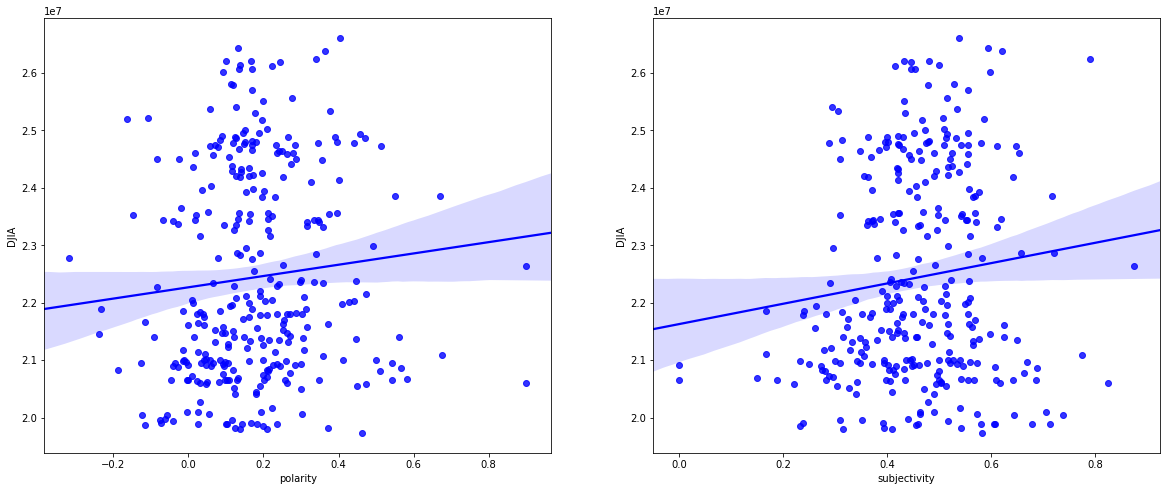

In [45]:
plt.figure(figsize= (20, 8))
pos = 1

for i in data_df.iloc[:,1:3]:
    plt.subplot(1,2, pos)
    sns.regplot(x=i, y='DJIA', data = data_df, color='blue')

    pos+=1

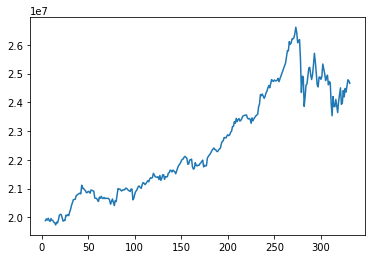

In [46]:
data_df.DJIA.plot()

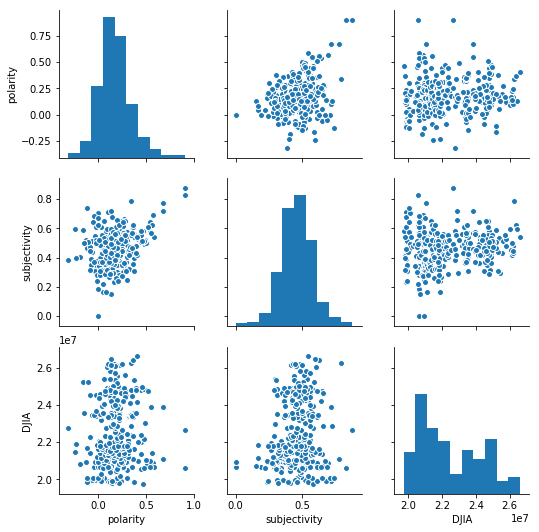

In [47]:
sns.pairplot(data_df)

In [48]:
data_df['log_dj'] =np.log(data_df.DJIA)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
data_df

,date,polarity,subjectivity,DJIA,log_dj
4,2017-01-03,0.234946,0.581505,19881076.0,16.805279
5,2017-01-04,-0.039706,0.516291,19942016.0,16.808339
6,2017-01-05,-0.072639,0.391647,19899029.0,16.806181
7,2017-01-06,0.116547,0.309958,19963080.0,16.809395
8,2017-01-09,0.183877,0.606703,19887038.0,16.805579
9,2017-01-10,0.200000,0.233333,19855053.0,16.803969
10,2017-01-11,-0.075093,0.351605,19954028.0,16.808942
11,2017-01-12,0.104167,0.712778,19891000.0,16.805778
12,2017-01-13,0.101250,0.460417,19885073.0,16.805480
13,2017-01-17,0.123742,0.541880,19826077.0,16.802509


In [50]:
data_df.corr()

,polarity,subjectivity,DJIA,log_dj
polarity,1.000000,0.323918,0.090995,0.092947
subjectivity,0.323918,1.000000,0.118621,0.115295
DJIA,0.090995,0.118621,1.000000,0.999382
log_dj,0.092947,0.115295,0.999382,1.000000


In [51]:
# heatmap

In [52]:
from sklearn import preprocessing, linear_model, pipeline
from sklearn import model_selection
from sklearn.metrics import r2_score

y = data_df['log_dj']
X = data_df[['polarity', 'subjectivity']]
data_df["one"]=np.ones(len(data_df))
data_df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,date,polarity,subjectivity,DJIA,log_dj,one
4,2017-01-03,0.234946,0.581505,19881076.0,16.805279,1.0
5,2017-01-04,-0.039706,0.516291,19942016.0,16.808339,1.0
6,2017-01-05,-0.072639,0.391647,19899029.0,16.806181,1.0
7,2017-01-06,0.116547,0.309958,19963080.0,16.809395,1.0
8,2017-01-09,0.183877,0.606703,19887038.0,16.805579,1.0
9,2017-01-10,0.200000,0.233333,19855053.0,16.803969,1.0
10,2017-01-11,-0.075093,0.351605,19954028.0,16.808942,1.0
11,2017-01-12,0.104167,0.712778,19891000.0,16.805778,1.0
12,2017-01-13,0.101250,0.460417,19885073.0,16.805480,1.0
13,2017-01-17,0.123742,0.541880,19826077.0,16.802509,1.0


In [53]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_dj   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1589.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          4.07e-131
Time:                        15:09:05   Log-Likelihood:                -635.77
No. Observations:                 221   AIC:                             1276.
Df Residuals:                     219   BIC:                             1282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
polarity        -0.1748      1.868     -0.094      0.926      -3.855       3.506
subjectivity    34.6098      0.944     36.680      0.000      32.750      36.469
==============================================================================
Omnibus:                        5.672   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                8.382
Skew:                           0.047   Prob(JB):                       0.0151
Kurtosis:                       3.949   Cond. No.                         3.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
r2_score(y_train, y_predict)

NameError: name 'y_predict' is not defined

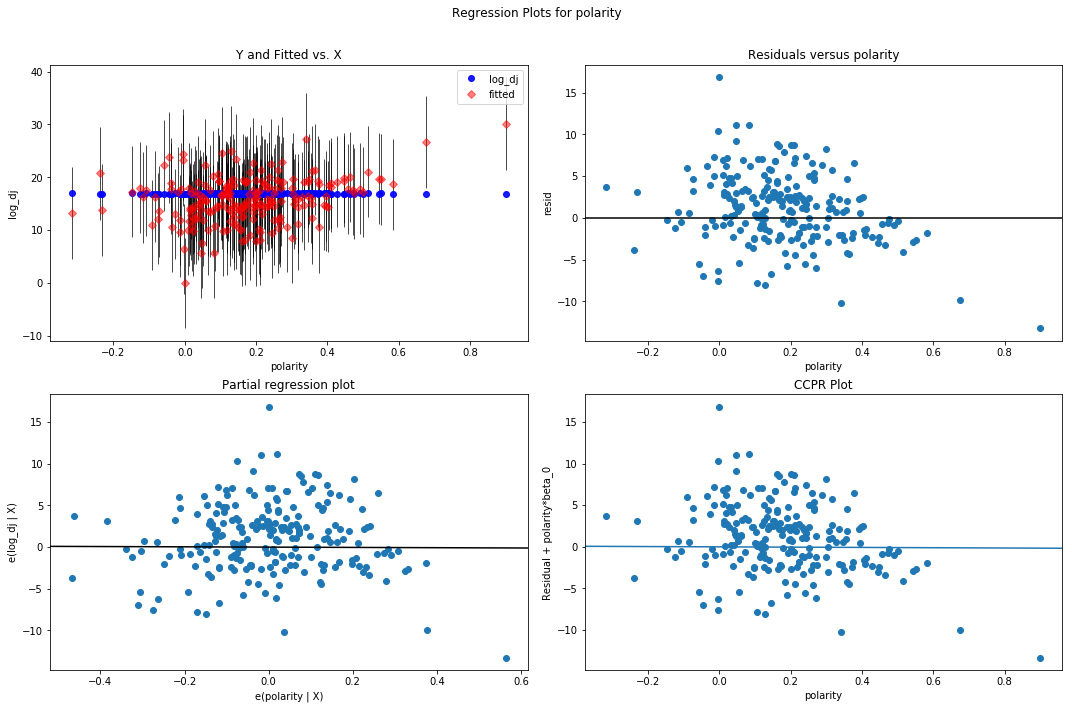

In [55]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(fit, 'polarity', fig=fig)

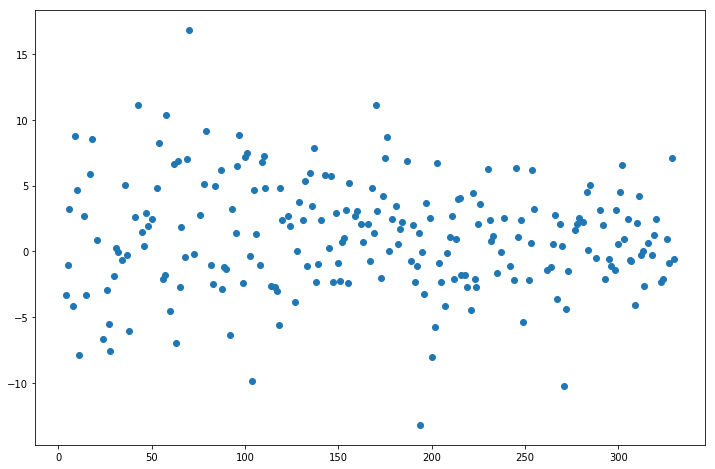

In [56]:
# residual plots

fit.resid.plot(style='o', figsize=(12,8));

In [57]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)
# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
y_predict = lr.predict(X_test)
print(r2_score(y_predict, y_test))
#lr.coef_

0.032254825972100276
-28.911715541993424


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### TIME SERIES TIME!!!!

In [58]:
time_df = data_df[['date','polarity','subjectivity', 'DJIA']]
time_df

,date,polarity,subjectivity,DJIA
4,2017-01-03,0.234946,0.581505,19881076.0
5,2017-01-04,-0.039706,0.516291,19942016.0
6,2017-01-05,-0.072639,0.391647,19899029.0
7,2017-01-06,0.116547,0.309958,19963080.0
8,2017-01-09,0.183877,0.606703,19887038.0
9,2017-01-10,0.200000,0.233333,19855053.0
10,2017-01-11,-0.075093,0.351605,19954028.0
11,2017-01-12,0.104167,0.712778,19891000.0
12,2017-01-13,0.101250,0.460417,19885073.0
13,2017-01-17,0.123742,0.541880,19826077.0


In [78]:
time_df['prev4']=time_df.prev3.shift()


,date,polarity,subjectivity,DJIA,one,prev_day,prev1,prev2,prev3,prev4
4,2017-01-03,0.234946,0.581505,19881076.0,1.0,NaN,NaN,NaN,NaN,NaN
5,2017-01-04,-0.039706,0.516291,19942016.0,1.0,19881076.0,NaN,NaN,NaN,NaN
6,2017-01-05,-0.072639,0.391647,19899029.0,1.0,19942016.0,19881076.0,NaN,NaN,NaN
7,2017-01-06,0.116547,0.309958,19963080.0,1.0,19899029.0,19942016.0,19881076.0,NaN,NaN
8,2017-01-09,0.183877,0.606703,19887038.0,1.0,19963080.0,19899029.0,19942016.0,19881076.0,NaN
9,2017-01-10,0.200000,0.233333,19855053.0,1.0,19887038.0,19963080.0,19899029.0,19942016.0,19881076.0
10,2017-01-11,-0.075093,0.351605,19954028.0,1.0,19855053.0,19887038.0,19963080.0,19899029.0,19942016.0
11,2017-01-12,0.104167,0.712778,19891000.0,1.0,19954028.0,19855053.0,19887038.0,19963080.0,19899029.0
12,2017-01-13,0.101250,0.460417,19885073.0,1.0,19891000.0,19954028.0,19855053.0,19887038.0,19963080.0
13,2017-01-17,0.123742,0.541880,19826077.0,1.0,19885073.0,19891000.0,19954028.0,19855053.0,19887038.0


In [106]:
lag_time = time_df
lag_time

,date,polarity,subjectivity,DJIA,one,prev_day,prev1,prev2,prev3,prev4
4,2017-01-03,0.234946,0.581505,19881076.0,1.0,NaN,NaN,NaN,NaN,NaN
5,2017-01-04,-0.039706,0.516291,19942016.0,1.0,19881076.0,NaN,NaN,NaN,NaN
6,2017-01-05,-0.072639,0.391647,19899029.0,1.0,19942016.0,19881076.0,NaN,NaN,NaN
7,2017-01-06,0.116547,0.309958,19963080.0,1.0,19899029.0,19942016.0,19881076.0,NaN,NaN
8,2017-01-09,0.183877,0.606703,19887038.0,1.0,19963080.0,19899029.0,19942016.0,19881076.0,NaN
9,2017-01-10,0.200000,0.233333,19855053.0,1.0,19887038.0,19963080.0,19899029.0,19942016.0,19881076.0
10,2017-01-11,-0.075093,0.351605,19954028.0,1.0,19855053.0,19887038.0,19963080.0,19899029.0,19942016.0
11,2017-01-12,0.104167,0.712778,19891000.0,1.0,19954028.0,19855053.0,19887038.0,19963080.0,19899029.0
12,2017-01-13,0.101250,0.460417,19885073.0,1.0,19891000.0,19954028.0,19855053.0,19887038.0,19963080.0
13,2017-01-17,0.123742,0.541880,19826077.0,1.0,19885073.0,19891000.0,19954028.0,19855053.0,19887038.0


In [60]:
#time_df['prev4_day']=time_df.prev3_day.shift()



In [80]:
lag_time["one"]=np.ones(len(lag_time))

In [81]:
#from sklearn.preprocessing import StandardScaler

In [82]:
#scalar = StandardScaler()


In [83]:
lag_time

,date,polarity,subjectivity,DJIA,one,prev_day,prev1,prev2,prev3,prev4
4,2017-01-03,0.234946,0.581505,19881076.0,1.0,NaN,NaN,NaN,NaN,NaN
5,2017-01-04,-0.039706,0.516291,19942016.0,1.0,19881076.0,NaN,NaN,NaN,NaN
6,2017-01-05,-0.072639,0.391647,19899029.0,1.0,19942016.0,19881076.0,NaN,NaN,NaN
7,2017-01-06,0.116547,0.309958,19963080.0,1.0,19899029.0,19942016.0,19881076.0,NaN,NaN
8,2017-01-09,0.183877,0.606703,19887038.0,1.0,19963080.0,19899029.0,19942016.0,19881076.0,NaN
9,2017-01-10,0.200000,0.233333,19855053.0,1.0,19887038.0,19963080.0,19899029.0,19942016.0,19881076.0
10,2017-01-11,-0.075093,0.351605,19954028.0,1.0,19855053.0,19887038.0,19963080.0,19899029.0,19942016.0
11,2017-01-12,0.104167,0.712778,19891000.0,1.0,19954028.0,19855053.0,19887038.0,19963080.0,19899029.0
12,2017-01-13,0.101250,0.460417,19885073.0,1.0,19891000.0,19954028.0,19855053.0,19887038.0,19963080.0
13,2017-01-17,0.123742,0.541880,19826077.0,1.0,19885073.0,19891000.0,19954028.0,19855053.0,19887038.0


Text(0.5,1,'Correlation of Features')

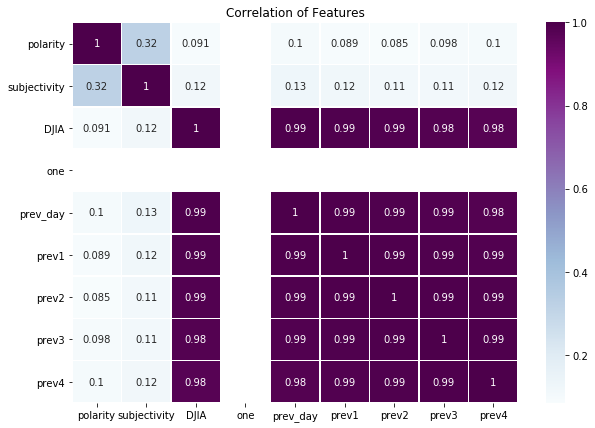

In [107]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(lag_time.corr(), annot=True, linewidths=.5, cmap='BuPu')
plt.title('Correlation of Features')
#lag_time.corr()

In [147]:
lag_time.head()

,date,polarity,subjectivity,DJIA,one,prev_day,prev1,prev2,prev3,prev4
4,2017-01-03,0.234946,0.581505,19881076.0,1.0,NaN,NaN,NaN,NaN,NaN
5,2017-01-04,-0.039706,0.516291,19942016.0,1.0,19881076.0,NaN,NaN,NaN,NaN
6,2017-01-05,-0.072639,0.391647,19899029.0,1.0,19942016.0,19881076.0,NaN,NaN,NaN
7,2017-01-06,0.116547,0.309958,19963080.0,1.0,19899029.0,19942016.0,19881076.0,NaN,NaN
8,2017-01-09,0.183877,0.606703,19887038.0,1.0,19963080.0,19899029.0,19942016.0,19881076.0,NaN


In [148]:
model = LinearRegression(fit_intercept=True)
X = lag_time.dropna().drop(["DJIA", "date"],1)
y = lag_time.dropna()["DJIA"]
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DJIA   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2561.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          9.50e-199
Time:                        16:12:06   Log-Likelihood:                -2953.3
No. Observations:                 217   AIC:                             5923.
Df Residuals:                     209   BIC:                             5950.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
polarity     -8.974e+04   8.67e+04     -1.035      0.302   -2.61e+05    8.12e+04
subjectivity -6.138e+04   1.17e+05     -0.522      0.602   -2.93e+05     1.7e+05
one           1.745e+05   1.72e+05      1.012      0.313   -1.65e+05    5.15e+05
prev_day         1.0265      0.074     13.902      0.000       0.881       1.172
prev1           -0.2628      0.102     -2.584      0.010      -0.463      -0.062
prev2            0.4322      0.100      4.343      0.000       0.236       0.628
prev3           -0.1607      0.108     -1.490      0.138      -0.373       0.052
prev4           -0.0402      0.076     -0.529      0.597      -0.190       0.109
==============================================================================
Omnibus:                       71.340   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.730
Skew:                          -1.106   Prob(JB):                     8.87e-96
Kurtosis:                       9.597   Cond. No.                     6.53e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
lr = LinearRegression(fit_intercept=False)  # we don't need intercept, we have 
#scalar.fit(X_train)
lr.fit(X_train,y_train)
# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
y_predict = lr.predict(X_test)
print(lr.score(X_test, y_test))
r2_score(y_test, y_predict)
print(lr.coef_)

0.9884738499726061
0.9946687010534715
[-8.97375919e+04 -6.13772673e+04  1.74536846e+05  1.02648297e+00
 -2.62769177e-01  4.32226437e-01 -1.60651338e-01 -4.01721514e-02]


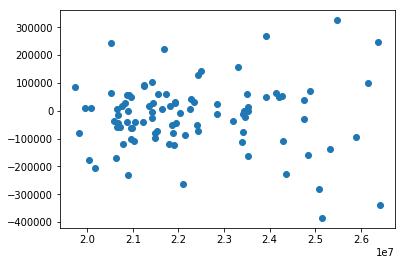

In [153]:
####PLOTS####

### residuals
#fit.resid.plot(style='o', figsize=(12,8));
res = y_test - y_predict
plt.scatter(y_predict, res)

In [154]:
import scipy.stats as stats

((array([-2.43984484, -2.10078997, -1.90443383, -1.76212604, -1.64853808,
         -1.55294363, -1.46974474, -1.39563247, -1.32848027, -1.26683639,
         -1.20966336, -1.15619258, -1.10583789, -1.05814138, -1.01273806,
         -0.96933196, -0.92767942, -0.88757727, -0.84885409, -0.81136379,
         -0.77498067, -0.73959565, -0.70511338, -0.67144988, -0.6385307 ,
         -0.60628943, -0.57466649, -0.54360811, -0.51306554, -0.48299432,
         -0.4533537 , -0.42410619, -0.39521711, -0.36665421, -0.3383874 ,
         -0.31038847, -0.28263081, -0.25508926, -0.22773989, -0.20055984,
         -0.17352719, -0.14662077, -0.1198201 , -0.09310524, -0.06645667,
         -0.03985522, -0.01328195,  0.01328195,  0.03985522,  0.06645667,
          0.09310524,  0.1198201 ,  0.14662077,  0.17352719,  0.20055984,
          0.22773989,  0.25508926,  0.28263081,  0.31038847,  0.3383874 ,
          0.36665421,  0.39521711,  0.42410619,  0.4533537 ,  0.48299432,
          0.51306554,  0.54360811,  0.

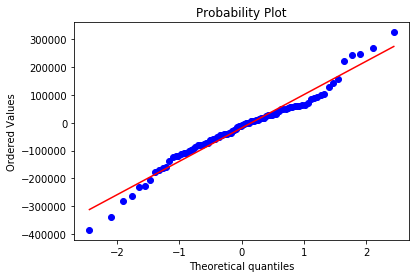

In [155]:
plt.figure()
stats.probplot(res, dist="norm", plot = plt)


In [116]:
####PLOTS####
x = range(len(time))
y_true = time_df
# plot actual grosses (blue spheres)
plt.scatter(X,y_test, label='actual ')

NameError: name 'time' is not defined

In [ ]:
x_pred = x[2:4]
y_predict = lr.predict(X_test)

# plot model prediction (red x signs)
plt.scatter(x_pred,y_pred, color='red', marker="x", label='predicted')

# Labels
plt.title("Mad Max Fury Road Weekly Gross over Time")
plt.xlabel("Week in theaters")
plt.ylabel("Weekly Gross")
plt.yscale('log')
plt.legend()

### Lag Time Series

In [125]:
lag_df = data_df[['date','polarity','subjectivity', 'DJIA']]
lag_df


,date,polarity,subjectivity,DJIA
4,2017-01-03,0.234946,0.581505,19881076.0
5,2017-01-04,-0.039706,0.516291,19942016.0
6,2017-01-05,-0.072639,0.391647,19899029.0
7,2017-01-06,0.116547,0.309958,19963080.0
8,2017-01-09,0.183877,0.606703,19887038.0
9,2017-01-10,0.200000,0.233333,19855053.0
10,2017-01-11,-0.075093,0.351605,19954028.0
11,2017-01-12,0.104167,0.712778,19891000.0
12,2017-01-13,0.101250,0.460417,19885073.0
13,2017-01-17,0.123742,0.541880,19826077.0


In [126]:
lag_df["delta"] = lag_df["DJIA"].diff()
lag_df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,polarity,subjectivity,DJIA,delta
4,2017-01-03,0.234946,0.581505,19881076.0,NaN
5,2017-01-04,-0.039706,0.516291,19942016.0,60940.0
6,2017-01-05,-0.072639,0.391647,19899029.0,-42987.0
7,2017-01-06,0.116547,0.309958,19963080.0,64051.0
8,2017-01-09,0.183877,0.606703,19887038.0,-76042.0
9,2017-01-10,0.200000,0.233333,19855053.0,-31985.0
10,2017-01-11,-0.075093,0.351605,19954028.0,98975.0
11,2017-01-12,0.104167,0.712778,19891000.0,-63028.0
12,2017-01-13,0.101250,0.460417,19885073.0,-5927.0
13,2017-01-17,0.123742,0.541880,19826077.0,-58996.0


In [131]:
lag_df['prev4']=lag_df.prev3.shift()


,date,polarity,subjectivity,DJIA,delta,prev1,prev2,prev3,prev4
4,2017-01-03,0.234946,0.581505,19881076.0,NaN,NaN,NaN,NaN,NaN
5,2017-01-04,-0.039706,0.516291,19942016.0,60940.0,NaN,NaN,NaN,NaN
6,2017-01-05,-0.072639,0.391647,19899029.0,-42987.0,60940.0,NaN,NaN,NaN
7,2017-01-06,0.116547,0.309958,19963080.0,64051.0,-42987.0,60940.0,NaN,NaN
8,2017-01-09,0.183877,0.606703,19887038.0,-76042.0,64051.0,-42987.0,60940.0,NaN
9,2017-01-10,0.200000,0.233333,19855053.0,-31985.0,-76042.0,64051.0,-42987.0,60940.0
10,2017-01-11,-0.075093,0.351605,19954028.0,98975.0,-31985.0,-76042.0,64051.0,-42987.0
11,2017-01-12,0.104167,0.712778,19891000.0,-63028.0,98975.0,-31985.0,-76042.0,64051.0
12,2017-01-13,0.101250,0.460417,19885073.0,-5927.0,-63028.0,98975.0,-31985.0,-76042.0
13,2017-01-17,0.123742,0.541880,19826077.0,-58996.0,-5927.0,-63028.0,98975.0,-31985.0


In [137]:
lag_df = lag_df
lag_df

,date,polarity,subjectivity,DJIA,delta,prev1,prev2,prev3,prev4
4,2017-01-03,0.234946,0.581505,19881076.0,NaN,NaN,NaN,NaN,NaN
5,2017-01-04,-0.039706,0.516291,19942016.0,60940.0,NaN,NaN,NaN,NaN
6,2017-01-05,-0.072639,0.391647,19899029.0,-42987.0,60940.0,NaN,NaN,NaN
7,2017-01-06,0.116547,0.309958,19963080.0,64051.0,-42987.0,60940.0,NaN,NaN
8,2017-01-09,0.183877,0.606703,19887038.0,-76042.0,64051.0,-42987.0,60940.0,NaN
9,2017-01-10,0.200000,0.233333,19855053.0,-31985.0,-76042.0,64051.0,-42987.0,60940.0
10,2017-01-11,-0.075093,0.351605,19954028.0,98975.0,-31985.0,-76042.0,64051.0,-42987.0
11,2017-01-12,0.104167,0.712778,19891000.0,-63028.0,98975.0,-31985.0,-76042.0,64051.0
12,2017-01-13,0.101250,0.460417,19885073.0,-5927.0,-63028.0,98975.0,-31985.0,-76042.0
13,2017-01-17,0.123742,0.541880,19826077.0,-58996.0,-5927.0,-63028.0,98975.0,-31985.0


In [138]:
lag_df["one"]=np.ones(len(lag_df))

In [139]:
X = lag_df.dropna().drop(["DJIA", "date", "delta"],1)
y = lag_df.dropna()["delta"]

In [140]:
model = LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     6.562
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           2.28e-06
Time:                        16:03:05   Log-Likelihood:                -2911.7
No. Observations:                 217   AIC:                             5837.
Df Residuals:                     210   BIC:                             5861.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
polarity      -1.35e+05   6.89e+04     -1.960      0.051   -2.71e+05     810.129
subjectivity -4.736e+04   9.79e+04     -0.484      0.629    -2.4e+05    1.46e+05
prev1           -0.0224      0.070     -0.322      0.748      -0.160       0.115
prev2           -0.2945      0.066     -4.440      0.000      -0.425      -0.164
prev3            0.1575      0.063      2.520      0.012       0.034       0.281
prev4           -0.0414      0.063     -0.658      0.511      -0.166       0.083
one           7.402e+04   4.44e+04      1.668      0.097   -1.35e+04    1.62e+05
==============================================================================
Omnibus:                       28.847   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.243
Skew:                          -0.363   Prob(JB):                     4.70e-27
Kurtosis:                       6.589   Cond. No.                     2.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

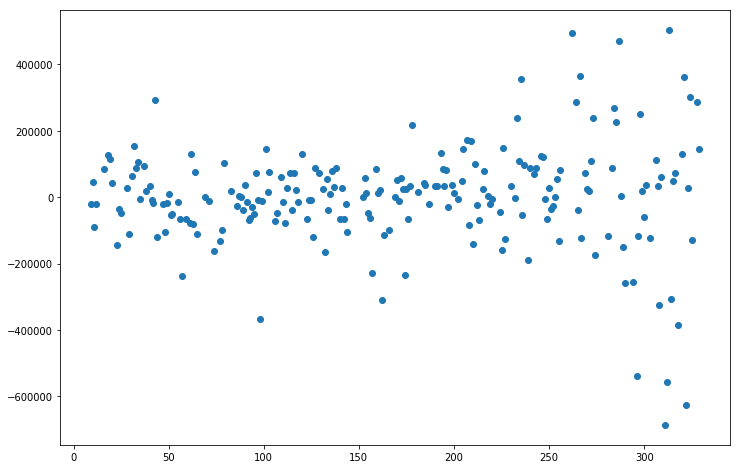

In [135]:
fit.resid.plot(style='o', figsize=(12,8));